<a href="https://colab.research.google.com/github/diegocastrovi/Python_2023/blob/main/GRUPO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final
# Python para Data Analytics

Grupo 2

Diego Castro Villanueva

Gerardo Vásquez Loro

Daniel Castillo Ramos

Fabiola Grissel Tapara Quispe


Para este proyecto se realizó el análisis del negocio de venta de equipos móviles para la empresa "OPACO", se enfocó principalmente en analizar los márgenes de ganancia y rendimiento que genera la venta de estos equipos según la marca y observasr que marcas son más rentables y cuales no lo están siendo, lo que ayudará a ejecutar un plan de acción para revertir resultados negativos.


Base de datos:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
phones_df = pd.read_excel("/content/drive/MyDrive/1 Bootcamp_Python_DRSP/Proyecto/Copia de 1. Base_proyecto.xlsx")

phones_df.head(5)

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,NaN,173.03390,192.39,NaN,NaN,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,355.22030,338.88,NaN,NaN,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,NaN,725.38980,769.94,NaN,NaN,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,56.23729,35.41,NaN,NaN,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,49.70339,34.85,NaN,NaN,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A


## Nivel Básico

1.- Haga una descripción general de los Datos.

In [ ]:
phones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19552 non-null  int64  
 1   Dia           19552 non-null  int64  
 2   EquipoSim     19552 non-null  object 
 3   Tipo          19552 non-null  object 
 4   Subtipo       19552 non-null  object 
 5   Marca         19552 non-null  object 
 6   Gama          19552 non-null  object 
 7   Precio        0 non-null      float64
 8   Ingreso       19552 non-null  float64
 9   Costo         19552 non-null  float64
 10  Margen        0 non-null      float64
 11  Rentabilidad  0 non-null      float64
 12  Tipo Venta    19552 non-null  object 
 13  CanalVenta    19551 non-null  object 
 14  CadenaDealer  16243 non-null  object 
 15  Departamento  19404 non-null  object 
 16  Canal         19552 non-null  object 
 17  SubCanal      19552 non-null  object 
 18  Cluster       19404 non-nu

In [ ]:
phones_df.shape

(19552, 19)

Se tienen 19 variables con 19552 observaciones
de estas variables se tienen:

*  7 variables de tipo numéricas
*  12 variables de tipo categórica



2.- Realice estadísticas descriptivas para las variables que usted crea conveniente.

In [ ]:
phones_df.describe(include=[np.number])

,Periodo,Dia,Precio,Ingreso,Costo,Margen,Rentabilidad
count,19552.0,19552.000000,0.0,19552.000000,19552.000000,0.0,0.0
mean,202110.0,15.902619,NaN,333.531571,351.304694,NaN,NaN
std,0.0,8.843870,NaN,243.325959,252.156903,NaN,NaN
min,202110.0,1.000000,NaN,7.118644,27.970000,NaN,NaN
25%,202110.0,8.000000,NaN,141.661000,157.060000,NaN,NaN
50%,202110.0,16.000000,NaN,298.271200,338.120000,NaN,NaN
75%,202110.0,23.000000,NaN,471.847400,540.405000,NaN,NaN
max,202110.0,31.000000,NaN,4177.932000,4271.580000,NaN,NaN


Estadísticas descriptivas de las variables categóricas:

In [ ]:
phones_df.describe(include = object)

,EquipoSim,Tipo,Subtipo,Marca,Gama,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
count,19552,19552,19552,19552,19552,19552,19551,16243,19404,19552,19552,19404
unique,1,2,3,15,5,3,11,475,24,4,11,3
top,Equipo,Celular,Smartphone,Bmobile,1. Low,Reno,GRANDES TIENDAS,ISLA,LIMA,Retail,GRANDES TIENDAS,Cluster A
freq,19552,19493,19362,4566,6540,10342,13449,1795,10335,13775,13449,11794


## Nivel Intermedio

3.- Haga análisis de los Valores Faltantes.

Se analiza si hay valores faltantes para las variables:

In [ ]:
phones_df.isnull().any()

Periodo         False
Dia             False
EquipoSim       False
Tipo            False
Subtipo         False
Marca           False
Gama            False
Precio           True
Ingreso         False
Costo           False
Margen           True
Rentabilidad     True
Tipo Venta      False
CanalVenta       True
CadenaDealer     True
Departamento     True
Canal           False
SubCanal        False
Cluster          True
dtype: bool

In [ ]:
phones_df.isnull().sum()

Periodo             0
Dia                 0
EquipoSim           0
Tipo                0
Subtipo             0
Marca               0
Gama                0
Precio          19552
Ingreso             0
Costo               0
Margen          19552
Rentabilidad    19552
Tipo Venta          0
CanalVenta          1
CadenaDealer     3309
Departamento      148
Canal               0
SubCanal            0
Cluster           148
dtype: int64

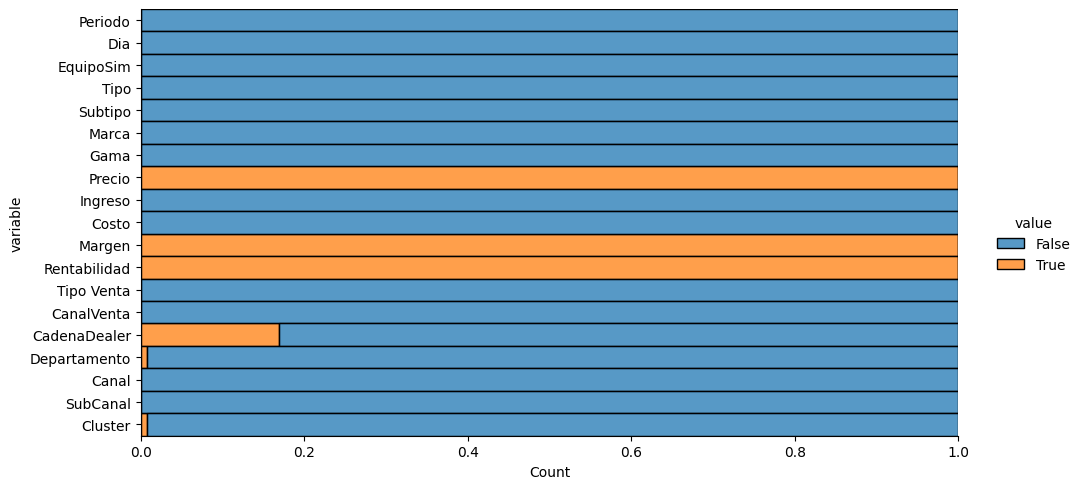

In [ ]:
df = phones_df.isnull().melt()

sns.displot(data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2)
plt.show()



*   Se observa que faltan todos los datos para Precio, Margen y Rentabilidad

*   Para la variable Cadena dealer faltan 3309 datos (~17% de datos)

*   Para la variable Departmento faltan 148 datos (~0.8% de datos)

*   Para la variable Clúster faltan 148 datos (~0.8% de datos)






Para poder trabajar lo solicitado se van a ingresar los valores de rentabilidad y margen

In [ ]:
phones_df['Margen'] = phones_df['Margen'].fillna(phones_df['Ingreso'] - phones_df['Costo'])
phones_df['Rentabilidad'] = phones_df['Rentabilidad'].fillna((phones_df['Margen']/phones_df['Costo'])*100)


phones_df.head(5)


,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,NaN,173.03390,192.39,-19.35610,-10.060866,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,355.22030,338.88,16.34030,4.821854,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,NaN,725.38980,769.94,-44.55020,-5.786191,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,56.23729,35.41,20.82729,58.817537,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,49.70339,34.85,14.85339,42.620918,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A


4.- Visualice los gráficos que sean necesarios (5 gráficos como máximo)

Vamos a ver cual es el margen por marca para darnos una idea de esta variable en general.


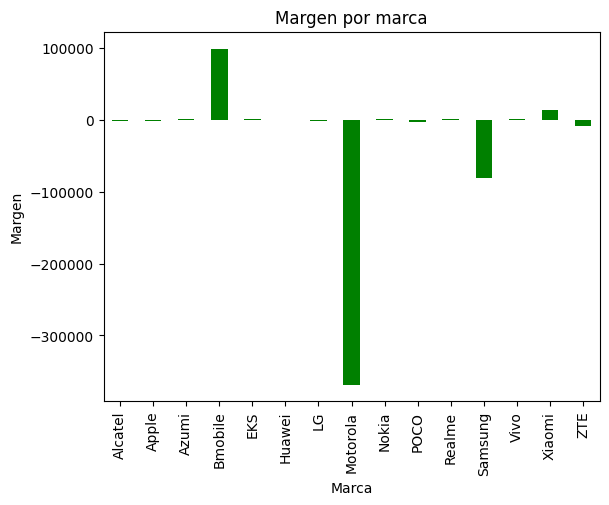

Marca
Alcatel      -2336.386490
Apple        -2066.810770
Azumi         1488.591000
Bmobile      99101.933654
EKS            555.622900
Huawei         131.910300
LG           -1308.618200
Motorola   -368353.647066
Nokia          826.408600
POCO         -2922.662100
Realme        1650.381800
Samsung     -80603.624130
Vivo          1476.503800
Xiaomi       13346.206320
ZTE          -8485.908574
Name: Margen, dtype: float64


In [ ]:
Margen_por_marca=phones_df.groupby('Marca')['Margen'].sum()

Margen_por_marca.plot(kind='bar', color="green")
plt.title('Margen por marca')
plt.xlabel('Marca')
plt.ylabel('Margen')
plt.xticks(rotation=90)
plt.show()
print(Margen_por_marca)

Se observa que la mayoria de marcas tiene un margen tienen un margen negativo, siendo Motorola el que se dispara negativamente y Bmobile es el que el margen positivo más elevado.


Utilizamos este gráfico para saber cual es el canal de venta más usado.

Canales más usados:


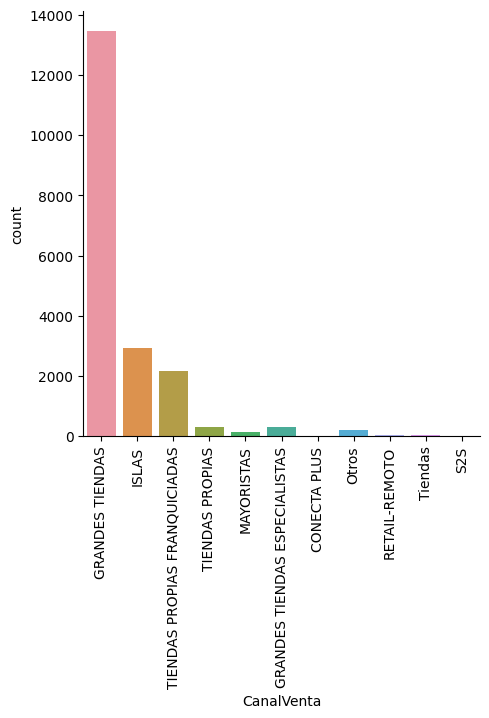

In [ ]:
sns.catplot(
    data=phones_df,
    x='CanalVenta',
    kind='count',
)
print("Canales más usados:")
plt.xticks(rotation=90)
plt.show()

Se observa que hay un canal de venta que es el más frecuentado por gran diferencia, estas son las Grandes Tiendas

Que marca es más rentable

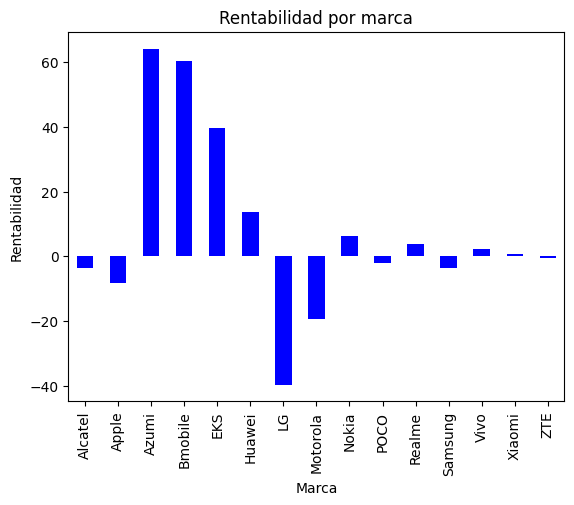

Marca
Alcatel     -3.555908
Apple       -8.248487
Azumi       64.107819
Bmobile     60.413755
EKS         39.729918
Huawei      13.781933
LG         -39.542099
Motorola   -19.463959
Nokia        6.137689
POCO        -2.103603
Realme       3.770461
Samsung     -3.711400
Vivo         2.225771
Xiaomi       0.686557
ZTE         -0.632933
Name: Rentabilidad, dtype: float64


In [ ]:
Rentabilidad_por_marca=phones_df.groupby('Marca')['Rentabilidad'].mean()


Rentabilidad_por_marca.plot(kind='bar', color="blue")
plt.title('Rentabilidad por marca')
plt.xlabel('Marca')
plt.ylabel('Rentabilidad')
plt.xticks(rotation=90)
plt.show()
print(Rentabilidad_por_marca)

Entre las diferentes marcas se observa una rentabilidad positiva de marcas como Bmobile, Azumi y EKS, marcas como LG y Motorola se observa que no son rentables para la empresa.


Costo por Marca

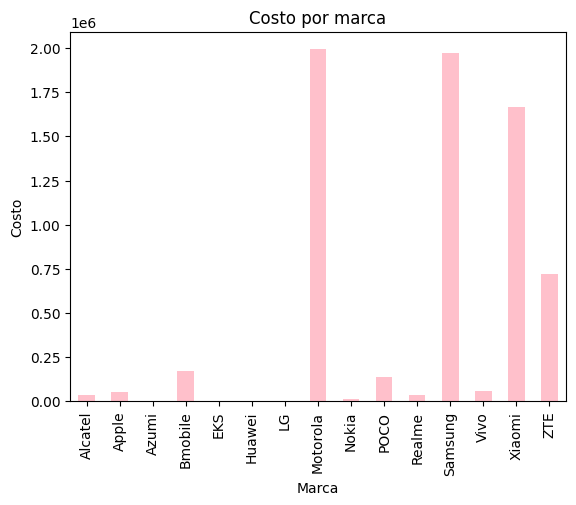

Marca
Alcatel     3.446292e+04
Apple       5.131596e+04
Azumi       2.322230e+03
Bmobile     1.716226e+05
EKS         1.398500e+03
Huawei      1.561310e+03
LG          3.309610e+03
Motorola    1.992758e+06
Nokia       1.366126e+04
POCO        1.389181e+05
Realme      3.615111e+04
Samsung     1.974476e+06
Vivo        5.879986e+04
Xiaomi      1.667174e+06
ZTE         7.207780e+05
Name: Costo, dtype: float64


In [ ]:
Costo_por_marca=phones_df.groupby('Marca')['Costo'].sum()

Costo_por_marca.plot(kind='bar', color="pink")
plt.title('Costo por marca')
plt.xlabel('Marca')
plt.ylabel('Costo')
plt.xticks(rotation=90)
plt.show()
print(Costo_por_marca)

Los equipos que generan los costos más grande son de las marcas Motorola, Samsung y Xiaomi
las otras marcas presentan costos muy bajos en comparación a estas

Ingreso por marca

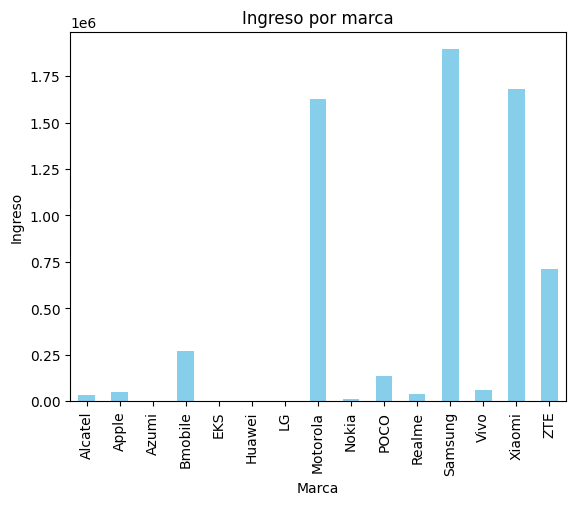

Marca
Alcatel     3.212653e+04
Apple       4.924915e+04
Azumi       3.810821e+03
Bmobile     2.707245e+05
EKS         1.954123e+03
Huawei      1.693220e+03
LG          2.000992e+03
Motorola    1.624405e+06
Nokia       1.448767e+04
POCO        1.359954e+05
Realme      3.780149e+04
Samsung     1.893872e+06
Vivo        6.027636e+04
Xiaomi      1.680520e+06
ZTE         7.122921e+05
Name: Ingreso, dtype: float64


In [ ]:
Ingreso_por_marca=phones_df.groupby('Marca')['Ingreso'].sum()

Ingreso_por_marca.plot(kind='bar', color="skyblue")
plt.title('Ingreso por marca')
plt.xlabel('Marca')
plt.ylabel('Ingreso')
plt.xticks(rotation=90)
plt.show()
print(Ingreso_por_marca)

Se oberva que los ingresos más elevados lo tienen las marcas Samsung, Xiaomi y Motorola, siendo marcas como LG y Huawei las que menos ingresos generan.

5.- Realice un headmap con las variables que usted considere

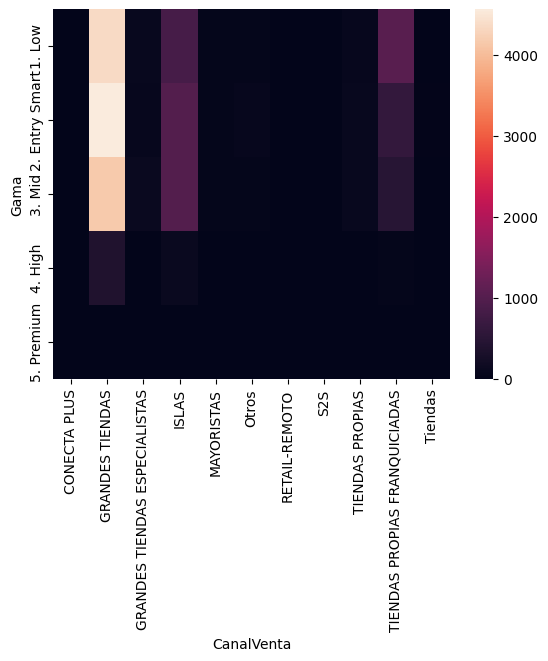

In [ ]:
MAP1 = pd.crosstab(phones_df['Gama'],phones_df['CanalVenta'])

sns.heatmap(MAP1)
plt.show()

En este mapa de calor la relación más visible es entre las ventas en grandes tiendas de smartphones de gama de entrada y baja, siguiendo las islas y las tiendas teniendo una tendencia similar pero con una relación mucho más baja.

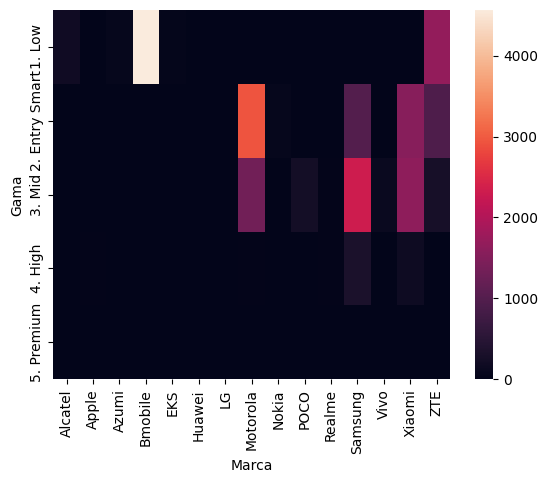

In [ ]:
MAP2 = pd.crosstab(phones_df['Gama'],phones_df['Marca'])

sns.heatmap(MAP2)
plt.show()

De este mapa de calor podemos observar que Bmobile es la marca que más tiene relación con los equipos de gama baja, mientras que Samgung es la marca que más relación tienen con los equipos de gama media, seguido por Xiami y Motorola; los cuales tambíen se encuentran realcionados con equipos de gama de entrada.

##Nivel Data Analyst

a.- ¿Cual es la distribución de marca de los equipos?

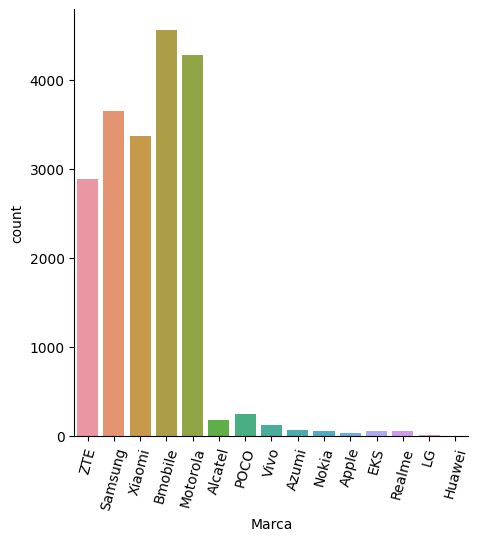

In [ ]:
sns.catplot(
    data=phones_df,
    x='Marca',
    kind='count'
)
plt.xticks(rotation = 75)
plt.show()

La Marca más vendida es Bmobile, seguido de Motorola y Samsung.

b.- ¿Que Tipo Venta trae más ingresos, Porta o VR?
(Porta=Portabilidad | VR=VentaRegular)

Ingreso por Tipo de Venta


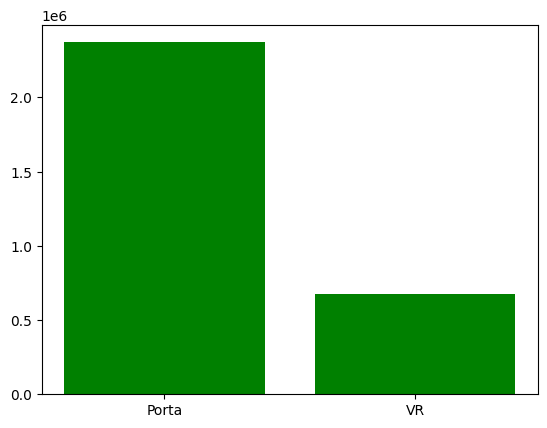

Tipo Venta
Porta    2.370448e+06
VR       6.754369e+05
Name: Ingreso, dtype: float64

In [ ]:
phones_df_filtr = phones_df[phones_df['Tipo Venta'] != 'Reno']

phones_df_filtr = phones_df_filtr.groupby('Tipo Venta')['Ingreso'].sum()

valores=phones_df_filtr.values
index=phones_df_filtr.index

plt.bar(index,valores, color = 'green')
print('Ingreso por Tipo de Venta')
plt.show()
phones_df_filtr

El tipo de venta Porta tiene más ingresos.

c.- ¿Qué marca tiene mejor margen en el Clúster B?

18824.10846

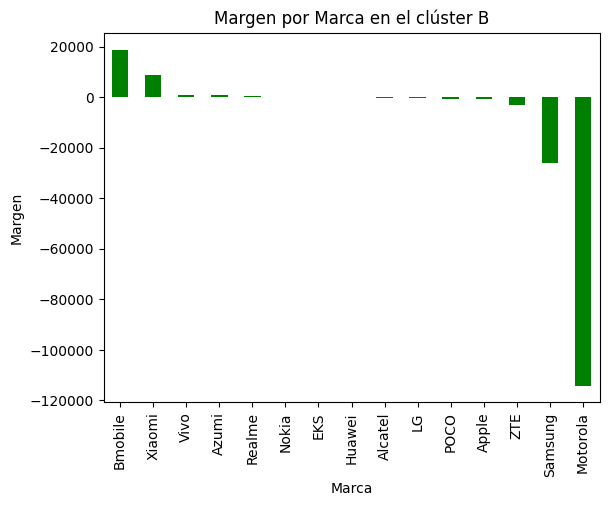

In [ ]:
phones_df_filt = phones_df[phones_df['Cluster'] == 'Cluster B']
phones_df_filt = phones_df_filt.groupby('Marca')['Margen'].sum().sort_values(ascending=False)

phones_df_filt.plot(kind='bar', color="green")
plt.title('Margen por Marca en el clúster B')
plt.xlabel('Marca')
plt.ylabel('Margen')

phones_df_filt.max()

In [ ]:
phones_df_filt

Marca
Bmobile      18824.10846
Xiaomi        8571.22322
Vivo           875.80890
Azumi          676.98646
Realme         575.93350
Nokia          197.43860
EKS            140.10507
Huawei         -80.32700
Alcatel       -354.39275
LG            -485.98720
POCO          -783.23590
Apple         -838.67630
ZTE          -3004.17597
Samsung     -26189.38988
Motorola   -114091.90471
Name: Margen, dtype: float64

BMobile tiene el mejor Margen en el clúster B, seguido de Xiaomi y Vivo.

d.- ¿Qué Canal tiene mayores costos?
(Canal = Retail, Islas, Tiendas, Otros)

<Axes: xlabel='CanalVenta'>

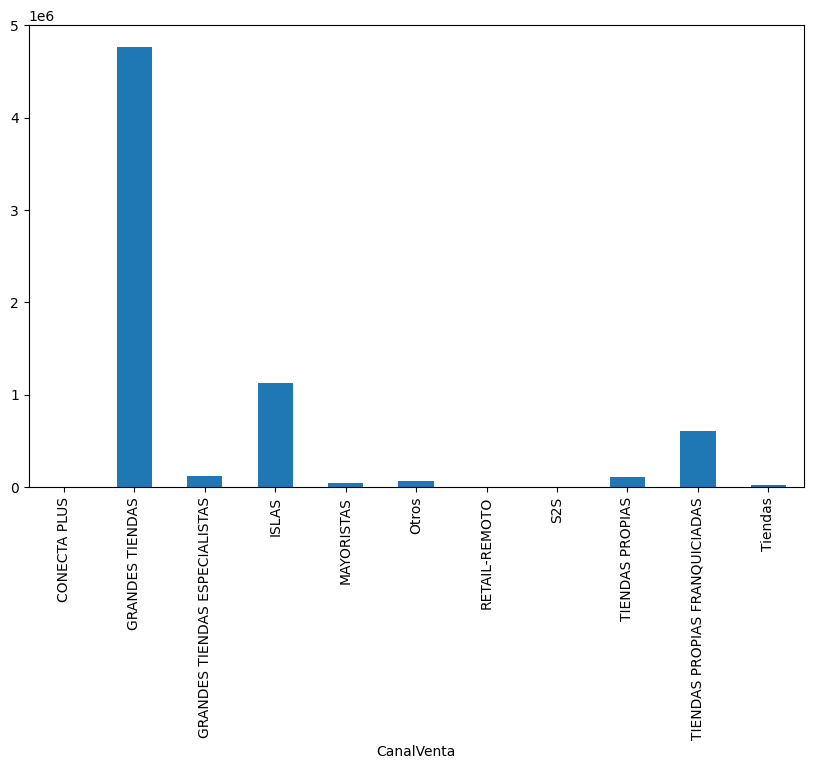

In [ ]:
phones_df_costos = phones_df.groupby('CanalVenta')['Costo'].sum()
phones_df_costos.plot(kind='bar', figsize=(10, 6))

El Canal con mayores costos son las Grandes Tiendas, seguido por las islas y las tiendas propias franquiciadas.

e.- ¿Cómo están distribuidos los ingresos?, haga un boxplot y un histograma para explicar

Boxplot de los Ingresos:

<Axes: xlabel='Ingreso'>

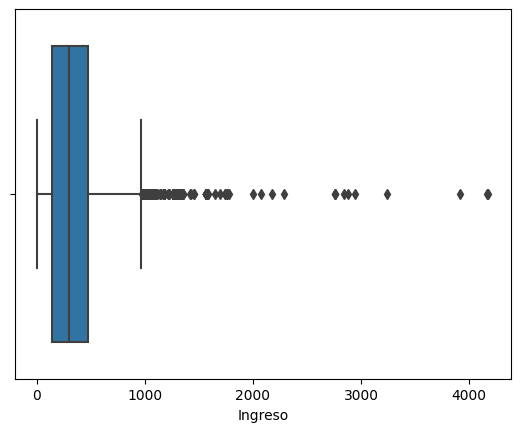

In [ ]:
sns.boxplot(
        data=phones_df,
        x='Ingreso',
    )

Se observa que la mayoria de los ingresos se encuentra concentrada entre 0 a 1000 soles, con algunos datos atípicos superiores a este rango.

Histograma

<Axes: xlabel='Ingreso', ylabel='Count'>

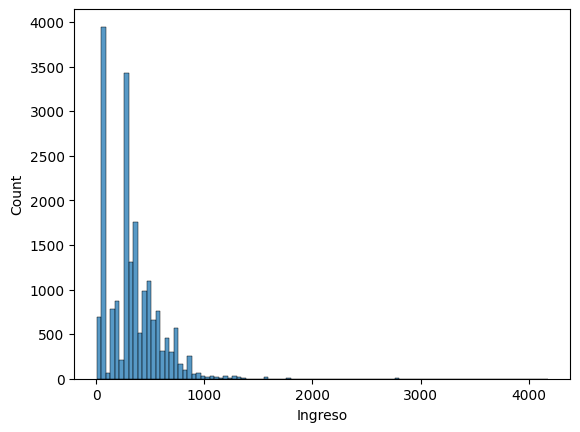

In [ ]:
sns.histplot(
        data=phones_df,
        x='Ingreso',
        bins = 100
    )

Se observa que la distribución del Ingreso no sigue una distribución normal, tiene un sesgo positivo; es decir, la mayor cantidad de Ingresos se encuentra distribuida entre 0 a 1000

f.- ¿Qué día del mes tuvo más ingresos? (Use la variable Ingreso)

<Axes: xlabel='Dia'>

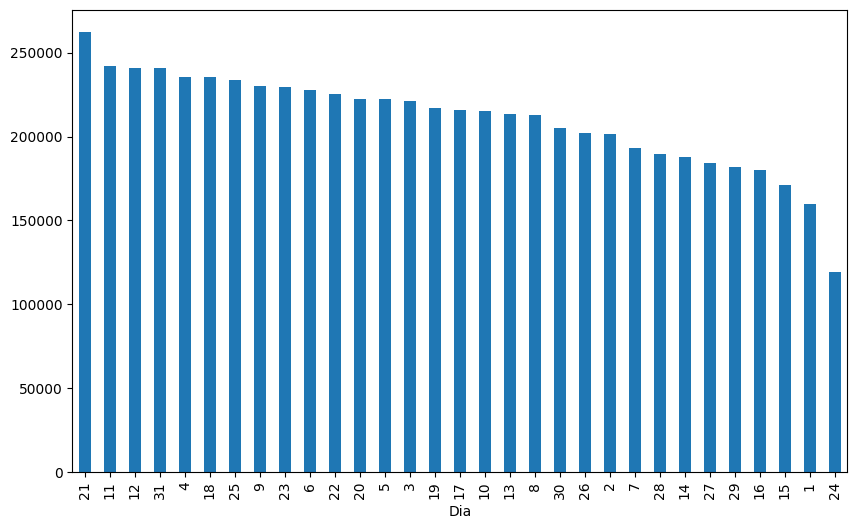

In [ ]:
phones_df_ingresoxdia = phones_df.groupby('Dia')['Ingreso'].sum().sort_values(ascending=False)
phones_df_ingresoxdia.plot(kind='bar', figsize=(10, 6))


In [ ]:
phones_df_ingresoxdia

Dia
21    262365.866880
11    241802.237170
12    241132.786370
31    241039.157160
4     235605.319290
18    235459.361380
25    233496.227920
9     230204.412310
23    229457.109820
6     227953.030130
22    225548.062510
20    222312.314760
5     222304.676230
3     221158.041610
19    217221.622820
17    216040.884964
10    215485.508920
13    213447.010260
8     212754.764660
30    205298.993500
26    202002.856850
2     201565.269790
7     193432.018510
28    189687.185670
14    187971.890700
27    184065.979230
29    182138.492886
16    180336.940544
15    171028.654800
1     159898.051570
24    118994.552160
Name: Ingreso, dtype: float64

El día con más ingresos del mes fue el 21 con S/.262365.87

g.- Realice un boxplot de la variable Costo y explíquelo a detalle indicando el Promedio, Máximo, Mínimo y Desviación estándar. Aplique la librería seaborn y separelo por gama

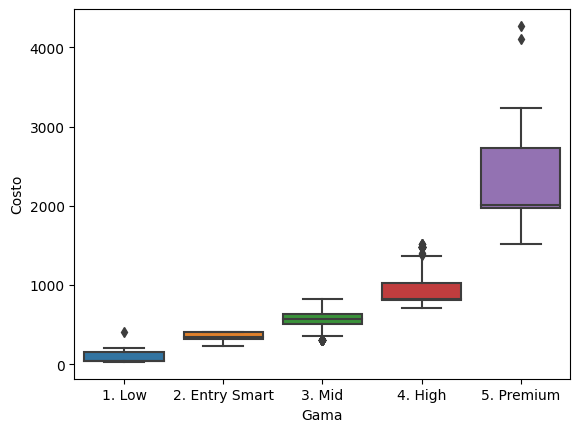

In [ ]:
sns.boxplot(
        data=phones_df,
        x = 'Gama',
        y = 'Costo',
    )
plt.show()

In [ ]:
phones_df.groupby('Gama')['Costo'].describe()

,count,mean,std,min,25%,50%,75%,max
Gama,,,,,,,,
1. Low,6540.0,77.506909,65.541212,27.97,34.70,35.31,157.060,404.70
2. Entry Smart,6487.0,358.112752,45.133561,224.62,320.66,338.35,405.210,409.36
3. Mid,5937.0,580.561438,103.869579,299.28,512.44,572.19,635.570,819.03
4. High,565.0,951.251090,211.189823,704.38,805.71,824.35,1027.860,1523.29
5. Premium,23.0,2368.984783,768.779354,1523.24,1966.90,2015.47,2727.125,4271.58


De este grafico se puede indicar que sigue la lógica de que los equipos de gama baja tienen un precio menor en promedio a los equipos de siguientes gamas, ademas observamos que la mayoria de equipo se encuentran entre baja, de entrada y media gama.La gama media es la gama que cuenta con los datos las cerca a los normales, mientras que la baja baja tiene un sesgo positivo concentrado y la gama premium por sulado un sesgo negativo disperso.

h.- Haga un gráfico de correlación entre los ingresos y el Margen, utilice la librería seaborn para poder utilizar hue=Marca

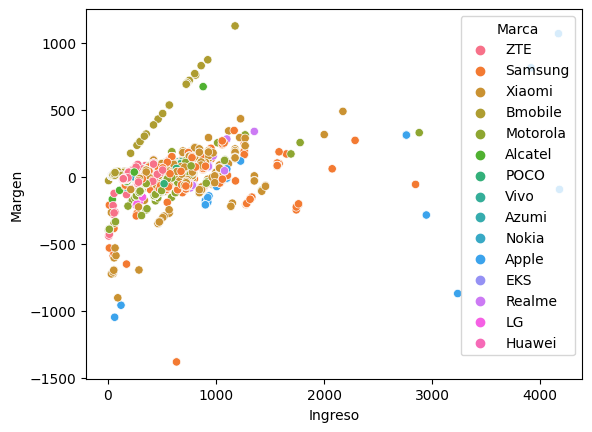

In [ ]:
sns.scatterplot(
    data=phones_df,
    x='Ingreso',
    y='Margen',
    hue='Marca'
)
plt.show()

Se oberva que la marca Bmobile tiene la mayor presencia, contando con los menores ingreso pero mejor margen de ganancia, mientras marca como Samsung cuenta con ingresos concentrados entre 500 y 1500, pero su margen de ganancia se mantiene cercano al limite de 0, marcas como Mototola tienen un margen negativo con respecto a sus ingresos.

## Conclusiones

* Como primera conclusión podemos ver que en la empresa OPOCA la mayor parte de las ventas se hacen por medio de las grandes tiendas las cuales a su vez tiene el mayor costo. Adicional a la información de venta se observa que el tipo de venta que genera más ingresos es PORTABILIDAD.

* Se observa que la concentración de la ventas de la empresa se encuentra entre 0 a 1000 soles, concluyendo que el mercado en donde se encuentran adquiere en su mayoria equipos entre estos precios, siendo los de gama baja, de entrada y media los más vendido.

* Se observa que Motorola es la segunda de marca con mayor ingreso, pero, a su vez tienen los costos más elevados, lo que genera que esta marca tenga un margen negativo y no sea rentable para la empresa, al ser una marca que a pesar de tener altos ingresos tiene un costo tan elevado que genera perdidas se concluye que lo ideal es que se deje de vender esta marca o adquirir equipos de gama más baja.

* Observamos que la marca más vendida es Bmobile, la cual a su vez es la que tiene el mejor márgen y la segunda más rentable, y al tener un costo bajo en promedio de la demás se concluye que es la marca a la que hay que seguir dandole el enfoque para generar ganancias.








